In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


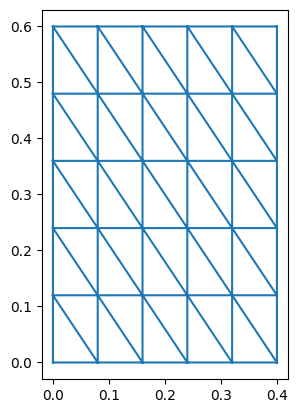

Connectivity Table:
[[ 0  1  6]
 [ 7  6  1]
 [ 1  2  7]
 [ 8  7  2]
 [ 2  3  8]
 [ 9  8  3]
 [ 3  4  9]
 [10  9  4]
 [ 4  5 10]
 [11 10  5]
 [ 6  7 12]
 [13 12  7]
 [ 7  8 13]
 [14 13  8]
 [ 8  9 14]
 [15 14  9]
 [ 9 10 15]
 [16 15 10]
 [10 11 16]
 [17 16 11]
 [12 13 18]
 [19 18 13]
 [13 14 19]
 [20 19 14]
 [14 15 20]
 [21 20 15]
 [15 16 21]
 [22 21 16]
 [16 17 22]
 [23 22 17]
 [18 19 24]
 [25 24 19]
 [19 20 25]
 [26 25 20]
 [20 21 26]
 [27 26 21]
 [21 22 27]
 [28 27 22]
 [22 23 28]
 [29 28 23]
 [24 25 30]
 [31 30 25]
 [25 26 31]
 [32 31 26]
 [26 27 32]
 [33 32 27]
 [27 28 33]
 [34 33 28]
 [28 29 34]
 [35 34 29]]


In [2]:
width = 0.4
height = 0.6
num_x_div = 5
num_y_div = 5
x = np.linspace(0, width, num_x_div + 1)
y = np.linspace(0, height, num_y_div + 1)
X, Y = np.meshgrid(x, y)
points = np.vstack((X.flatten(), Y.flatten())).T

# Create triangular connectivity
triangles = []
for i in range(num_y_div):
    for j in range(num_x_div):
        p1 = i * (num_x_div + 1) + j
        p2 = p1 + 1
        p3 = p1 + (num_x_div + 1)
        p4 = p3 + 1
        triangles.append([p1, p2, p3])
        triangles.append([p4, p3, p2])

triangles = np.array(triangles)# Convert to 1-based indexing
# Plot the mesh
plt.triplot(points[:, 0], points[:, 1], triangles)
plt.gca().set_aspect('equal')
plt.show()

# Display the connectivity table
print("Connectivity Table:")
print(triangles)

In [4]:
def mesh_generator(width, height, num_x_div, num_y_div):
    # Generate grid points
    x = np.linspace(0, width, num_x_div + 1)
    y = np.linspace(0, height, num_y_div + 1)
    X, Y = np.meshgrid(x, y)
    points = np.vstack((X.flatten(), Y.flatten())).T

    # Create triangular connectivity
    triangles = []
    for i in range(num_y_div):
        for j in range(num_x_div):
            p1 = i * (num_x_div + 1) + j
            p2 = p1 + 1
            p3 = p1 + (num_x_div + 1)
            p4 = p3 + 1
            triangles.append([p1, p2, p3])
            triangles.append([p4, p3, p2])

    triangles = np.array(triangles) + 1  # Convert to 1-based indexing
    return points, triangles

In [5]:
domain_width = 0.4
domain_height = 0.6
no_of_elem_x = 5
no_of_elem_y = 5
nodes, connectivity_matrix = mesh_generator(domain_width, domain_height, no_of_elem_x, no_of_elem_y)

In [13]:
def mesh_data_generator(points, triangles, num_x_div, num_y_div, width, height, filename='mesh_data'):
    with open(filename+".dat", 'w') as f:
        f.write(f"TITLE = {file_name}\n")
        f.write(f"ELEMENTS = {len(triangles)}\n")
        
        for i, tri in enumerate(triangles, start=1):
            f.write(f"{i}\t{tri[0]}\t{tri[1]}\t{tri[2]}\t1.5\n")
        
        f.write("\nNODE_COORDINATES = {}\n".format(len(points)))
        
        for i, point in enumerate(points, start=1):
            f.write(f"{i}\t{point[0]}\t{point[1]}\t0.0\n")
        
        f.write(f"\nNODES_WITH_PRESCRIBED_TEMPERATURE = {(num_x_div + 1) * 2 + (num_y_div + 1)*2 - 4}\n")
        
        for i, point in enumerate(points, start = 1):
            if point[1] == height:
                f.write(f"{i}\t180.000\n")
                continue
            if point[0] == 0:
                f.write(f"{i}\t0.000\n")
                continue
            if point[1] == 0:
                f.write(f"{i}\t0.000\n")
                continue
            if point[0] == width:
                f.write(f"{i}\t0.000\n")
                continue
        
        f.write("\nEDGES_WITH_PRESCRIBED_CONVECTION = 0\n")
        f.write("\nEDGES_WITH_PRESCRIBED_NON_ZERO_HEAT_FLUX = 0\n")

    print(f"Mesh data file generated: {filename}")

In [14]:
domain_width = 0.4
domain_height = 0.6
no_of_elem_x = 2
no_of_elem_y = 4
nodes, connectivity_matrix = mesh_generator(domain_width, domain_height, no_of_elem_x, no_of_elem_y)
file_name = "Mesh1"
mesh_data_generator(nodes, connectivity_matrix,no_of_elem_x, no_of_elem_y, domain_width, domain_height, file_name)

Mesh data file generated: Mesh1


In [15]:
domain_width = 0.4
domain_height = 0.6
no_of_elem_x = 2
no_of_elem_y = 2
nodes, connectivity_matrix = mesh_generator(domain_width, domain_height, no_of_elem_x, no_of_elem_y)
file_name = "Mesh2"
mesh_data_generator(nodes, connectivity_matrix,no_of_elem_x, no_of_elem_y, domain_width, domain_height, file_name)

Mesh data file generated: Mesh2


In [16]:
domain_width = 0.4
domain_height = 0.6
no_of_elem_x = 1
no_of_elem_y = 2
nodes, connectivity_matrix = mesh_generator(domain_width, domain_height, no_of_elem_x, no_of_elem_y)
file_name = "Mesh3"
mesh_data_generator(nodes, connectivity_matrix,no_of_elem_x, no_of_elem_y, domain_width, domain_height, file_name)

Mesh data file generated: Mesh3
